In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [19]:
X_dat = pd.read_csv("./data/ceramics.csv")
X_dat.head()

,CGWU,GrWU,MnBow,MncC,MVWWL,MVWWLM,PdBow,ARoo,ChpG,MccG,...,RMBow,KtBow,TdBow,DlrR,MRwtU,TBoo,MPBor,SnBow,KaBow,WhtMnBow
0,0.205882,0.073529,0.117647,0.117647,0.411765,0.044118,0.029412,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.013158,0.000000,0.000000,0.013158,0.000000,0.013158,0.052632,0.065789,0.013158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.381818,0.000000,0.054545,0.054545,0.200000,0.145455,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.261905,0.000000,0.095238,0.011905,0.202381,0.119048,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.420690,0.000000,0.000000,0.000000,0.268966,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_dat.shape

(4366, 97)

In [21]:
type_names = X_dat.columns
type_names[0]

'CGWU'

In [22]:
def str_to_list(string): 
    li = list(string) 
    return li 

types = []
for site in X_dat.values:
    tmp = ""
    i = 0
    for type in site:
        #print(type)
        if type > 0:
            tmp = tmp + " " + type_names[i]
        i = i + 1
    types.append(tmp)

In [23]:
print(types)

[' CGWU GrWU MnBow MncC MVWWL MVWWLM PdBow', ' GrWU MVWWL PdBow ARoo ChpG MccG PGWU', ' CGWU MnBow MncC MVWWL MVWWLM PGWU CrBow MVWWLO', ' CGWU MnBow MncC MVWWL MVWWLM PGWU CrBow MVWWLO DlrC MVBow', ' CGWU MVWWL PGWU MVWWLO MVBow KynP MEBow MsVC', ' CGWU MnBow MncC MVWWL MVWWLM PGWU CrBow DLPBor MncG SJRWU', ' CGWU MnBow MVWWL MVWWLM MVWWLO MVBow MEBow MsVC', ' CGWU GrWU MnBow MncC MVWWL MVWWLM ARoo ChpG PGWU CrBow MVWWLO DlrC MVBow MEBow MncG SJRWU TsgO', ' CGWU MnBow MVWWL MVWWLM PGWU CrBow MVWWLO', ' CGWU GrWU MnBow MncC MVWWL MVWWLM PdBow PGWU DlrC MncG SJRWU', ' CGWU MnBow MncC MVWWL MVWWLM PdBow ARoo PGWU CrBow DLPBor', ' CGWU PdBow ChpG PGWU SJRWU BBor ChpBow PIWhWTU', ' CGWU MncC MVWWL MVWWLM ChpG PGWU CrBow', ' CGWU MnBow MVWWL MVWWLM PGWU SJRWU', ' CGWU PGWU', ' CGWU MVWWL MVWWLM PGWU MVWWLO DlrC MVBow MEBow MsVC SJRWU PIIIWWTU', ' CGWU MnBow MVWWL MVWWLM PGWU BBor', ' GrWU PIWhWTU', ' CGWU MnBow MncC MVWWL MVWWLM PGWU MVWWLO DlrC MVBow MEBow MsVC SJRWU', ' CGWU GrWU MnBow Mn

In [24]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.data import Dataset

In [25]:
# Create the vocabulary dataset
vocabulary = Dataset.from_tensor_slices(type_names)
# Create the vectorization layer.
vectorize_layer = TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=8)
vectorize_layer.adapt(vocabulary.batch(64))

In [26]:
# Create the model that uses the vectorize text layer
model = Sequential()
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
input_data = types
input_array = model.predict(input_data)

137/137 [==============================] - 0s 271us/step


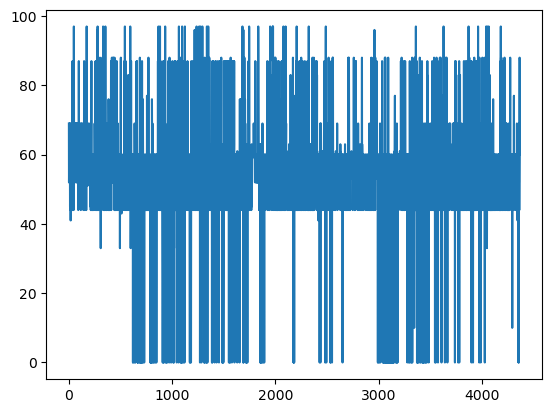

In [27]:
plt.plot(input_array[:, 1])

In [28]:
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=100, output_dim=1))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array)

137/137 [==============================] - 0s 225us/step
[[[ 0.03647145]
  [-0.00563188]
  [ 0.01339387]
  ...
  [-0.00391952]
  [ 0.01117421]
  [ 0.03216824]]

 [[-0.00563188]
  [ 0.02832098]
  [ 0.01117421]
  ...
  [ 0.01246288]
  [ 0.0355694 ]
  [ 0.03216824]]

 [[ 0.03647145]
  [ 0.01339387]
  [-0.01797535]
  ...
  [ 0.0355694 ]
  [-0.01335485]
  [-0.0052896 ]]

 ...

 [[ 0.0355694 ]
  [ 0.03223341]
  [-0.00459287]
  ...
  [ 0.03216824]
  [ 0.03216824]
  [ 0.03216824]]

 [[ 0.02832098]
  [ 0.0254884 ]
  [ 0.0355694 ]
  ...
  [ 0.03216824]
  [ 0.03216824]
  [ 0.03216824]]

 [[ 0.03647145]
  [ 0.01339387]
  [-0.01797535]
  ...
  [ 0.0254884 ]
  [ 0.0355694 ]
  [-0.0052896 ]]]


In [29]:
output_array.shape

(4366, 8, 1)

In [30]:
output_array[:,0,:]

array([[ 0.03647145],
       [-0.00563188],
       [ 0.03647145],
       ...,
       [ 0.0355694 ],
       [ 0.02832098],
       [ 0.03647145]], dtype=float32)

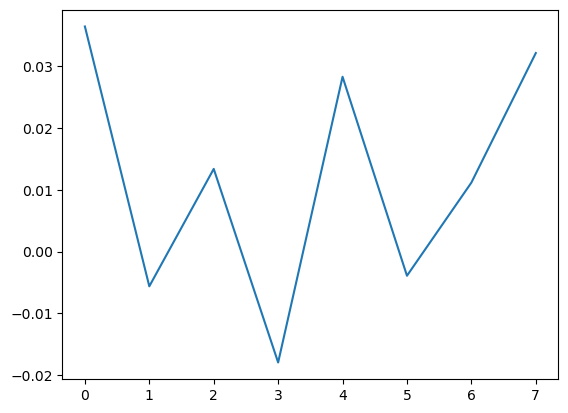

In [31]:
plt.plot(output_array[0,:,:])

## UMAP for visualizing clusters of ceramic types

First K-means the embeddings, then pass to UMAP

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 6
km = KMeans(n_clusters=k).fit(input_array)

In [50]:
from umap import UMAP
meds_umap = UMAP(n_components=2, init='random', random_state=0, n_neighbors=150, min_dist=0.9)
meds_umap.fit_transform(input_array)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([[ 1.0664783 ,  5.2089067 ],
       [ 0.5374364 ,  4.0095897 ],
       [ 2.3972695 ,  2.5547354 ],
       ...,
       [-0.73497236, -8.525632  ],
       [-4.9990444 , -0.29222062],
       [ 6.1333957 ,  3.2408295 ]], dtype=float32)

<Axes: >

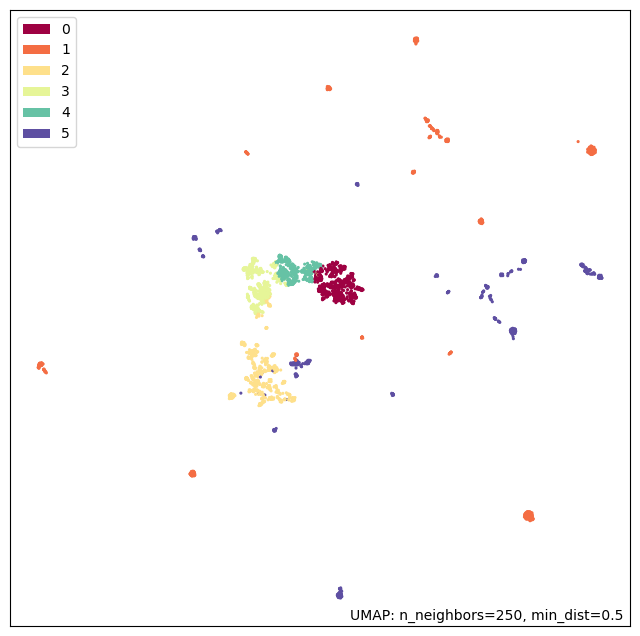

In [51]:
import umap.plot
#umap.plot.points(docs_umap, labels=dat['sent2'])
umap.plot.points(meds_umap, labels=km.labels_)
#umap.plot.points(meds_umap)